In [69]:
# Dependencies
import numpy as np
import pandas as pd
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [70]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each tableimport
Measurement = Base.classes.measurement
Station = Base.classes.station

In [71]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [72]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract
import datetime as dt
# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_month = session.query(Measurement.tobs).filter(func.strftime('%m', Measurement.date) == '06').all()

In [73]:
#  3. Convert the June temperatures to a list.
june_month = list(june_month)

In [74]:
type(june_month)

list

In [75]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_month_df = pd.DataFrame(june_month,columns=['June temps'])
june_month_df

,June temps
0,78.0
1,76.0
2,78.0
3,76.0
4,77.0
...,...
1695,79.0
1696,74.0
1697,74.0
1698,76.0


In [76]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_month_df.describe()

,June temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [77]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
December_month = session.query(Measurement.tobs).filter(func.strftime('%m', Measurement.date) == '12').all()

In [78]:
# 7. Convert the December temperatures to a list.
December_month = list(December_month)

In [79]:
type(December_month)

list

In [82]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
December_month_df = pd.DataFrame(December_month,columns=['December temps'])
December_month_df

,December temps
0,76.0
1,74.0
2,74.0
3,64.0
4,64.0
...,...
1512,71.0
1513,71.0
1514,69.0
1515,65.0


In [83]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
December_month_df.describe()

,December temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [84]:
june_summary_stats=june_month_df.describe()
Dec_summary_stats=December_month_df.describe()

In [85]:
merged_summary_df=june_summary_stats.merge(Dec_summary_stats,left_index=True,right_index=True)
merged_summary_df

,June temps,December temps
count,1700.000000,1517.000000
mean,74.944118,71.041529
std,3.257417,3.745920
min,64.000000,56.000000
25%,73.000000,69.000000
50%,75.000000,71.000000
75%,77.000000,74.000000
max,85.000000,83.000000


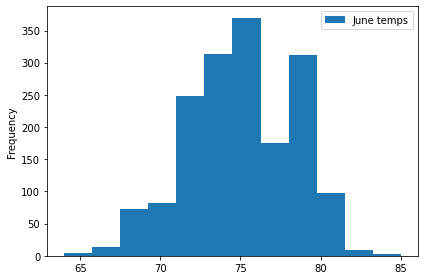

In [87]:
# Plot June results to visualize summary statistics
import matplotlib.pyplot as plt
june_month_df.plot.hist(bins=12)
plt.tight_layout()


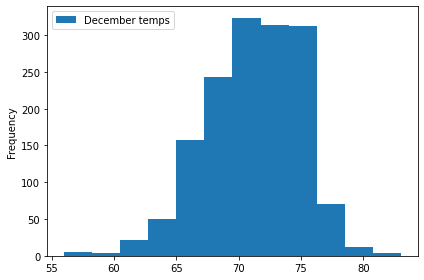

In [88]:
# Plot June results to visualize summary statistics
import matplotlib.pyplot as plt
December_month_df.plot.hist(bins=12)
plt.tight_layout()
